In [82]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

from sklearn.preprocessing import StandardScaler, RobustScaler

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, roc_curve
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [2]:
pwd

'C:\\Users\\Muhammad Hazim'

In [5]:
df = pd.read_csv('C:\\Users\\Muhammad Hazim\\Desktop\\creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [15]:
df.isnull().any().any()

False

In [14]:
df.describe().round(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


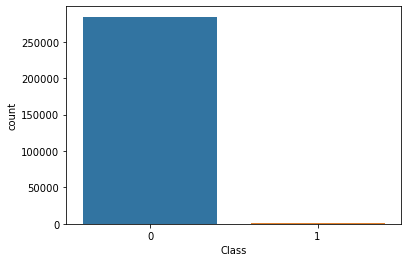

In [19]:
sns.countplot(df.Class)

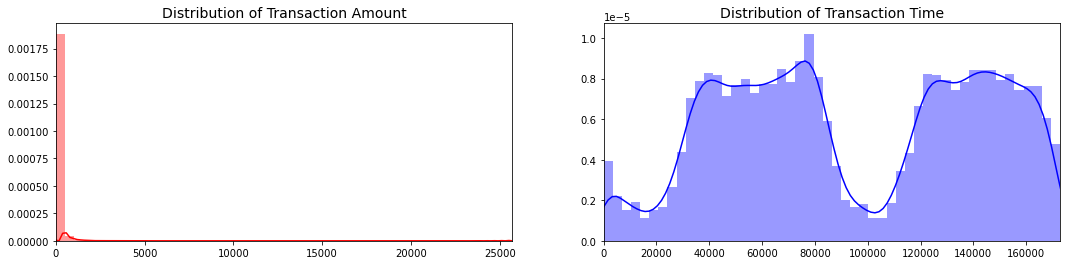

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])


plt.show()

In [24]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [25]:
x = df.drop("Class", axis=1)
y = df["Class"]

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y)

## Logictic Regression

In [27]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [28]:
df1 = pd.DataFrame(index = ['Accuracy', 'Precision', 'ROC AUC'] )
df1['Train Score'] = [accuracy_score(y_train, lr.predict(x_train)), precision_score(y_train, lr.predict(x_train)), roc_auc_score(y_train, lr.predict_proba(x_train)[:,1])]
df1['Test Score'] = [accuracy_score(y_test, lr.predict(x_test)), precision_score(y_test, lr.predict(x_test)), roc_auc_score(y_test, lr.predict_proba(x_test)[:,1])]        
df1

,Train Score,Test Score
Accuracy,0.999241,0.999175
Precision,0.890459,0.831169
ROC AUC,0.982009,0.956048


## Decision Tree Classifier

In [36]:
dt = DecisionTreeClassifier(max_depth = 5)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [37]:
df1 = pd.DataFrame(index = ['Accuracy', 'Precision', 'ROC AUC'] )
df1['Train Score'] = [accuracy_score(y_train, dt.predict(x_train)), precision_score(y_train, dt.predict(x_train)), roc_auc_score(y_train, dt.predict_proba(x_train)[:,1])]
df1['Test Score'] = [accuracy_score(y_test, dt.predict(x_test)), precision_score(y_test, dt.predict(x_test)), roc_auc_score(y_test, dt.predict_proba(x_test)[:,1])]        
df1

,Train Score,Test Score
Accuracy,0.999565,0.999491
Precision,0.935103,0.915663
ROC AUC,0.918673,0.902965


## Random Forest Classifier

In [38]:
rf = RandomForestClassifier(max_depth=5)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=5)

In [39]:
df1 = pd.DataFrame(index = ['Accuracy', 'Precision', 'ROC AUC'] )
df1['Train Score'] = [accuracy_score(y_train, rf.predict(x_train)), precision_score(y_train, rf.predict(x_train)), roc_auc_score(y_train, rf.predict_proba(x_train)[:,1])]
df1['Test Score'] = [accuracy_score(y_test, rf.predict(x_test)), precision_score(y_test, rf.predict(x_test)), roc_auc_score(y_test, rf.predict_proba(x_test)[:,1])]        
df1

,Train Score,Test Score
Accuracy,0.999517,0.999438
Precision,0.952229,0.902439
ROC AUC,0.971062,0.965488


## MLP Classifier

In [70]:
mlp = MLPClassifier(max_iter = 100, hidden_layer_sizes = 50)
mlp.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=50, max_iter=100)

In [71]:
df1 = pd.DataFrame(index = ['Accuracy', 'Precision', 'ROC AUC'] )
df1['Train Score'] = [accuracy_score(y_train, mlp.predict(x_train)), precision_score(y_train, mlp.predict(x_train)), roc_auc_score(y_train, mlp.predict_proba(x_train)[:,1])]
df1['Test Score'] = [accuracy_score(y_test, mlp.predict(x_test)), precision_score(y_test, mlp.predict(x_test)), roc_auc_score(y_test, mlp.predict_proba(x_test)[:,1])]        
df1

,Train Score,Test Score
Accuracy,0.999671,0.999526
Precision,0.981873,0.908046
ROC AUC,0.998577,0.980202


## Catboost Classifier

In [40]:
cb = CatBoostClassifier(learning_rate = 0.001)
cb.fit(x_train, y_train)

0:	learn: 0.6896612	total: 2.06s	remaining: 34m 13s
1:	learn: 0.6857105	total: 2.24s	remaining: 18m 37s
2:	learn: 0.6821257	total: 2.51s	remaining: 13m 52s
3:	learn: 0.6786194	total: 2.73s	remaining: 11m 19s
4:	learn: 0.6749845	total: 2.93s	remaining: 9m 42s
5:	learn: 0.6711682	total: 3.14s	remaining: 8m 40s
6:	learn: 0.6673804	total: 3.38s	remaining: 7m 59s
7:	learn: 0.6637664	total: 3.59s	remaining: 7m 24s
8:	learn: 0.6599699	total: 3.77s	remaining: 6m 55s
9:	learn: 0.6562454	total: 3.98s	remaining: 6m 33s
10:	learn: 0.6528368	total: 4.16s	remaining: 6m 14s
11:	learn: 0.6492922	total: 4.36s	remaining: 5m 58s
12:	learn: 0.6455758	total: 4.66s	remaining: 5m 53s
13:	learn: 0.6421537	total: 4.83s	remaining: 5m 39s
14:	learn: 0.6388138	total: 5.06s	remaining: 5m 32s
15:	learn: 0.6353976	total: 5.22s	remaining: 5m 20s
16:	learn: 0.6320217	total: 5.43s	remaining: 5m 14s
17:	learn: 0.6283284	total: 5.6s	remaining: 5m 5s
18:	learn: 0.6246717	total: 5.83s	remaining: 5m 1s
19:	learn: 0.6212262	

158:	learn: 0.2793256	total: 40.3s	remaining: 3m 33s
159:	learn: 0.2776889	total: 40.6s	remaining: 3m 33s
160:	learn: 0.2763613	total: 40.8s	remaining: 3m 32s
161:	learn: 0.2747188	total: 41.1s	remaining: 3m 32s
162:	learn: 0.2730978	total: 41.4s	remaining: 3m 32s
163:	learn: 0.2714880	total: 41.7s	remaining: 3m 32s
164:	learn: 0.2697217	total: 41.9s	remaining: 3m 32s
165:	learn: 0.2681333	total: 42.3s	remaining: 3m 32s
166:	learn: 0.2666009	total: 42.5s	remaining: 3m 32s
167:	learn: 0.2650158	total: 42.7s	remaining: 3m 31s
168:	learn: 0.2637050	total: 42.9s	remaining: 3m 31s
169:	learn: 0.2624935	total: 43.1s	remaining: 3m 30s
170:	learn: 0.2610313	total: 43.3s	remaining: 3m 30s
171:	learn: 0.2594438	total: 43.6s	remaining: 3m 29s
172:	learn: 0.2579235	total: 43.8s	remaining: 3m 29s
173:	learn: 0.2564032	total: 44s	remaining: 3m 28s
174:	learn: 0.2547685	total: 44.2s	remaining: 3m 28s
175:	learn: 0.2532400	total: 44.5s	remaining: 3m 28s
176:	learn: 0.2517299	total: 44.8s	remaining: 3m

313:	learn: 0.1127251	total: 1m 17s	remaining: 2m 48s
314:	learn: 0.1120908	total: 1m 17s	remaining: 2m 48s
315:	learn: 0.1114659	total: 1m 17s	remaining: 2m 48s
316:	learn: 0.1108148	total: 1m 18s	remaining: 2m 48s
317:	learn: 0.1101886	total: 1m 18s	remaining: 2m 47s
318:	learn: 0.1096062	total: 1m 18s	remaining: 2m 47s
319:	learn: 0.1089600	total: 1m 18s	remaining: 2m 47s
320:	learn: 0.1083700	total: 1m 18s	remaining: 2m 47s
321:	learn: 0.1077277	total: 1m 19s	remaining: 2m 46s
322:	learn: 0.1071300	total: 1m 19s	remaining: 2m 46s
323:	learn: 0.1064970	total: 1m 19s	remaining: 2m 46s
324:	learn: 0.1059082	total: 1m 19s	remaining: 2m 45s
325:	learn: 0.1052964	total: 1m 20s	remaining: 2m 45s
326:	learn: 0.1047119	total: 1m 20s	remaining: 2m 45s
327:	learn: 0.1041448	total: 1m 20s	remaining: 2m 44s
328:	learn: 0.1035621	total: 1m 20s	remaining: 2m 44s
329:	learn: 0.1029905	total: 1m 20s	remaining: 2m 44s
330:	learn: 0.1023773	total: 1m 21s	remaining: 2m 43s
331:	learn: 0.1018078	total:

465:	learn: 0.0496276	total: 1m 51s	remaining: 2m 7s
466:	learn: 0.0493779	total: 1m 51s	remaining: 2m 7s
467:	learn: 0.0491405	total: 1m 51s	remaining: 2m 7s
468:	learn: 0.0488957	total: 1m 52s	remaining: 2m 7s
469:	learn: 0.0486383	total: 1m 52s	remaining: 2m 6s
470:	learn: 0.0483949	total: 1m 52s	remaining: 2m 6s
471:	learn: 0.0481213	total: 1m 53s	remaining: 2m 6s
472:	learn: 0.0478906	total: 1m 53s	remaining: 2m 6s
473:	learn: 0.0476605	total: 1m 53s	remaining: 2m 5s
474:	learn: 0.0474088	total: 1m 53s	remaining: 2m 5s
475:	learn: 0.0471766	total: 1m 53s	remaining: 2m 5s
476:	learn: 0.0469397	total: 1m 54s	remaining: 2m 5s
477:	learn: 0.0467073	total: 1m 54s	remaining: 2m 4s
478:	learn: 0.0464615	total: 1m 54s	remaining: 2m 4s
479:	learn: 0.0462392	total: 1m 54s	remaining: 2m 4s
480:	learn: 0.0460135	total: 1m 54s	remaining: 2m 3s
481:	learn: 0.0457750	total: 1m 54s	remaining: 2m 3s
482:	learn: 0.0455535	total: 1m 55s	remaining: 2m 3s
483:	learn: 0.0453203	total: 1m 55s	remaining:

619:	learn: 0.0245381	total: 2m 25s	remaining: 1m 29s
620:	learn: 0.0244389	total: 2m 26s	remaining: 1m 29s
621:	learn: 0.0243389	total: 2m 26s	remaining: 1m 28s
622:	learn: 0.0242394	total: 2m 26s	remaining: 1m 28s
623:	learn: 0.0241413	total: 2m 26s	remaining: 1m 28s
624:	learn: 0.0240437	total: 2m 26s	remaining: 1m 28s
625:	learn: 0.0239459	total: 2m 27s	remaining: 1m 28s
626:	learn: 0.0238422	total: 2m 27s	remaining: 1m 27s
627:	learn: 0.0237393	total: 2m 27s	remaining: 1m 27s
628:	learn: 0.0236359	total: 2m 28s	remaining: 1m 27s
629:	learn: 0.0235405	total: 2m 28s	remaining: 1m 27s
630:	learn: 0.0234507	total: 2m 28s	remaining: 1m 26s
631:	learn: 0.0233569	total: 2m 28s	remaining: 1m 26s
632:	learn: 0.0232632	total: 2m 29s	remaining: 1m 26s
633:	learn: 0.0231708	total: 2m 29s	remaining: 1m 26s
634:	learn: 0.0230784	total: 2m 29s	remaining: 1m 25s
635:	learn: 0.0229858	total: 2m 29s	remaining: 1m 25s
636:	learn: 0.0228940	total: 2m 29s	remaining: 1m 25s
637:	learn: 0.0228034	total:

773:	learn: 0.0138328	total: 3m	remaining: 52.6s
774:	learn: 0.0137891	total: 3m	remaining: 52.4s
775:	learn: 0.0137407	total: 3m	remaining: 52.1s
776:	learn: 0.0136970	total: 3m	remaining: 51.9s
777:	learn: 0.0136481	total: 3m	remaining: 51.6s
778:	learn: 0.0136040	total: 3m 1s	remaining: 51.4s
779:	learn: 0.0135600	total: 3m 1s	remaining: 51.1s
780:	learn: 0.0135165	total: 3m 1s	remaining: 50.9s
781:	learn: 0.0134731	total: 3m 1s	remaining: 50.7s
782:	learn: 0.0134300	total: 3m 1s	remaining: 50.4s
783:	learn: 0.0133871	total: 3m 2s	remaining: 50.2s
784:	learn: 0.0133452	total: 3m 2s	remaining: 49.9s
785:	learn: 0.0132985	total: 3m 2s	remaining: 49.7s
786:	learn: 0.0132565	total: 3m 2s	remaining: 49.4s
787:	learn: 0.0132119	total: 3m 2s	remaining: 49.2s
788:	learn: 0.0131707	total: 3m 3s	remaining: 49s
789:	learn: 0.0131300	total: 3m 3s	remaining: 48.7s
790:	learn: 0.0130846	total: 3m 3s	remaining: 48.5s
791:	learn: 0.0130438	total: 3m 3s	remaining: 48.2s
792:	learn: 0.0130000	total: 

930:	learn: 0.0087399	total: 3m 34s	remaining: 15.9s
931:	learn: 0.0087192	total: 3m 34s	remaining: 15.6s
932:	learn: 0.0086963	total: 3m 34s	remaining: 15.4s
933:	learn: 0.0086748	total: 3m 34s	remaining: 15.2s
934:	learn: 0.0086530	total: 3m 34s	remaining: 14.9s
935:	learn: 0.0086295	total: 3m 35s	remaining: 14.7s
936:	learn: 0.0086081	total: 3m 35s	remaining: 14.5s
937:	learn: 0.0085869	total: 3m 35s	remaining: 14.3s
938:	learn: 0.0085665	total: 3m 35s	remaining: 14s
939:	learn: 0.0085474	total: 3m 36s	remaining: 13.8s
940:	learn: 0.0085271	total: 3m 36s	remaining: 13.6s
941:	learn: 0.0085073	total: 3m 36s	remaining: 13.3s
942:	learn: 0.0084884	total: 3m 36s	remaining: 13.1s
943:	learn: 0.0084677	total: 3m 36s	remaining: 12.9s
944:	learn: 0.0084444	total: 3m 36s	remaining: 12.6s
945:	learn: 0.0084220	total: 3m 37s	remaining: 12.4s
946:	learn: 0.0084010	total: 3m 37s	remaining: 12.2s
947:	learn: 0.0083798	total: 3m 37s	remaining: 11.9s
948:	learn: 0.0083582	total: 3m 37s	remaining: 1

In [41]:
df1 = pd.DataFrame(index = ['Accuracy', 'Precision', 'ROC AUC'] )
df1['Train Score'] = [accuracy_score(y_train, cb.predict(x_train)), precision_score(y_train, cb.predict(x_train)), roc_auc_score(y_train, cb.predict_proba(x_train)[:,1])]
df1['Test Score'] = [accuracy_score(y_test, cb.predict(x_test)), precision_score(y_test, cb.predict(x_test)), roc_auc_score(y_test, cb.predict_proba(x_test)[:,1])]        
df1

,Train Score,Test Score
Accuracy,0.999517,0.999491
Precision,0.952229,0.960000
ROC AUC,0.987672,0.977413


## XGBooost Classifier

In [83]:
xgb = XGBClassifier(max_depth = 4)
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [84]:
df1 = pd.DataFrame(index = ['Accuracy', 'Precision', 'ROC AUC'] )
df1['Train Score'] = [accuracy_score(y_train, xgb.predict(x_train)), precision_score(y_train, xgb.predict(x_train)), roc_auc_score(y_train, xgb.predict_proba(x_train)[:,1])]
df1['Test Score'] = [accuracy_score(y_test, xgb.predict(x_test)), precision_score(y_test, xgb.predict(x_test)), roc_auc_score(y_test, xgb.predict_proba(x_test)[:,1])]        
df1

,Train Score,Test Score
Accuracy,0.999996,0.999579
Precision,1.000000,0.930233
ROC AUC,1.000000,0.982599


## ROC Curve

In [85]:
classifiers = [lr, dt, rf, mlp, cb, xgb]

result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])


for cls in classifiers:
    yproba = cls.predict_proba(x_test)[:,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

result_table.set_index('classifiers', inplace=True)

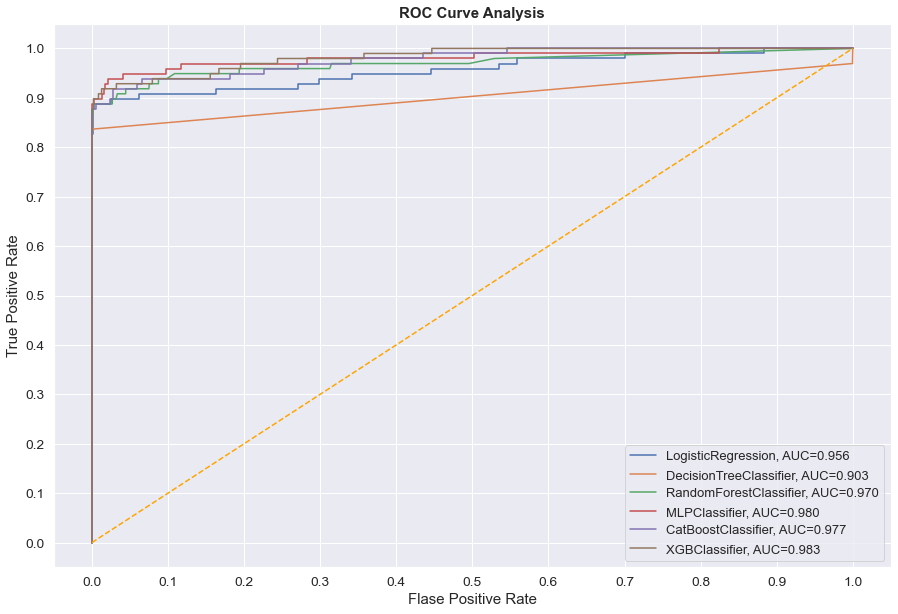

In [86]:
fig = plt.figure(figsize=(15,10))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

## Feature Importance of Random Forest Clasiffier

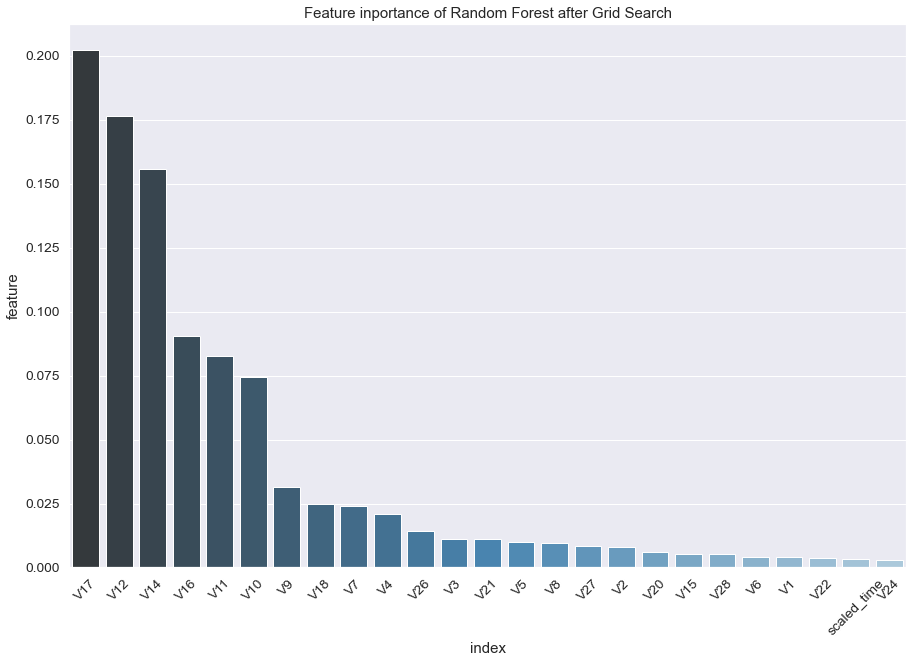

In [88]:
def build_feature_importance(model, x_train, y_train):
    
    models = RandomForestClassifier(max_depth = 5)
    models.fit(x_train, y_train)
    data = pd.DataFrame(models.feature_importances_, x_train.columns, columns=["feature"])
    data = data.sort_values(by='feature', ascending=False).reset_index()
    plt.figure(figsize=(15,10))
    sns.barplot(x='index', y='feature', data=data[:25], palette="Blues_d")
    plt.title('Feature inportance of Random Forest after Grid Search')
    plt.xticks(rotation=45)
    plt.show();
    
build_feature_importance(RandomForestClassifier, x_train, y_train)